<p class='cooltitle' style="font-size:35px; text-align:center;" >Enzyme Kinetics</p>

<br><br>

In this notebook, we're going to implement some basic enzyme kinetics notions in Python, enzyme kinetics play a major role in Neuroscience as they dictate how ion channels and molecular interaction networks in intracellular signaling are regulated. We're going to use differential equations to express those kinetics because they are considered as the mathematical objects of scientific modeling. 

<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Zero-and-First-Order-Reactions" data-toc-modified-id="Zero-and-First-Order-Reactions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Zero and First Order Reactions</a></span></li><li><span><a href="#Enzymatic-Equilibrium" data-toc-modified-id="Enzymatic-Equilibrium-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Enzymatic Equilibrium</a></span></li><li><span><a href="#Michaelis-Menten-Henri-Equation" data-toc-modified-id="Michaelis-Menten-Henri-Equation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Michaelis-Menten-Henri Equation</a></span></li></ul></div>

Let's start by importing some libraries that we'll use mainly here and in the rest of the Notebooks. 

In [118]:
import numpy as np # A Python package for scientific computing 
import sympy as sp # A Python library for symbolic mathematics  
import matplotlib.pyplot as plt # A data visualization Library in Python

# Zero and First Order Reactions
<br>


- Considering a chemical reaction catalyzed by an enzyme for a reactant $A$ that transforms into a product $B$  : 

$$A \xrightarrow{enzyme} B$$

> If the concentration of the enzyme is far less than the concentration of $A$, we can say that the enzyme is saturated and the depletion of the reactant $A$ or the appearance of the product $B$ is constant and is independant from the concentration of the reactant $A$.
$$\frac{d[B]}{dt} = - \frac{d[A]}{dt} = k $$
$k$ being the rate constant of the reaction

- We can see that this expression is equivalent to : 
$$\boxed{- \frac{d[A]}{dt} = k[A]^0 = k}$$
>The rate of the reaction $\frac{d[A]}{dt}$ does not depend on the concentration of reactants,but only on the rate constant $k$, in what we call a zero-order chemical reaction. This is a differential equation, solving it consists of finding the function that gives the conentration of the reactant in function of time $A(t)$, it is easy to solve at hand but sometimes differential equations get complicated really fast, this is why we  use computers.

- If the rate depends linearly upon the concentration of the reactant $A$, the equation becomes :
$$\boxed{- \frac{d[A]}{dt} = k[A]}$$ 
> The first order reaction, this too is considered as a differential equation and can be solved the same way as the previous one.


- In order to solve differential equations using python, we can use two different approaches : <br>
>1 - Analytical methods; by using Python's Sympy library for symbolic mathematics.<br>
2 - Numerical Methods; by implementing Euler's method which is used for solving ordinary differential equations (ODEs) and then we can use Python's NumPy Library and its useful N-dimensional array objects that are the cosidered the basis of scientific computing.

<font size="+2"><b>Zero-order</b></font> <br> <br>
**Analytical Method**

> Let's start first by initialising Sympy's symbol objects which we will be able to manipulate

In [119]:
k, t, C1 = sp.symbols(
    'k t C1')  # Rate constant k , time t and arbitrary integration constant C1

> The reactant concentration $A$ should be initialised as Sympy Function Object and it should be in the differentiated form with respect to time $t$

In [120]:
A = sp.Function('A')
dAdt = A(t).diff(t)

> Now we can write the zero order equation

In [121]:
zero_order = sp.Eq(-dAdt, k)
zero_order

Eq(-Derivative(A(t), t), k)

> The next step is to solve this differential equation, this can be easily done by using SymPy's function dsolve that takes the equation and the variable to be solved to as parameters.

In [122]:
analytic_gen_sol_zero = sp.dsolve(zero_order, A(t))
analytic_gen_sol_zero

Eq(A(t), C1 - k*t)

> This is the general solution to our differential equation, in order to calculate the arbitrary constant C1 we can initialize $t=0$ in our general solution to find a particular one.

In [123]:
C1_zero = analytic_gen_sol_zero.subs(
    t, 0)  # This substitutes t with the value of 0 in our general solution
C1_zero

Eq(A(0), C1)

> The arbitrary constant $C_1$ is the concentration of the reactant at time 0 (the initial condition)

In [124]:
analytic_gen_sol_zero = analytic_gen_sol_zero.subs(C1, A(0))
analytic_gen_sol_zero

Eq(A(t), -k*t + A(0))

> This is the formula for the general solution of the differential equation, in order to find a particular solution let's consider that the rate constant $k=2$ and the initial concentration of the reactant $A(0) = 10$ 

In [125]:
analytic_par_sol_zero = analytic_gen_sol_zero.subs({A(0): 10, k: 2})
analytic_par_sol_zero

Eq(A(t), 10 - 2*t)

> Since this is an algebraic SymPy expression, we cannot numerically evaluate it, we have to transform it into a lambda function, we can use SymPy's lambdify function to achieve that.

In [126]:
analytic_sol_zero = sp.lambdify(
    t, analytic_par_sol_zero.rhs,
    "numpy")  # We took the right hand side with .rhs method from our solution

**Numerical Method**

> In order to numerically solve differential equations, we have to implement the Euler's method, let's proceed by writing a python function that will work with every differential equation. *For a detailed explanation of Euler's Method, check out Steven Strogatz's Nonlinear dynamics and Chaos*

In [127]:
def euler(init_cond, *constants,  equation, dt=0.01, Tmax=10):
    """Euler's Method for solving ODEs.
    init_cond :  The initial condition to start solving from.
    constants : a variable length argument with constants in the ODE
    equation : the differential equation to be solved.
    dt : the time interval between every step.
    Tmax : the maximal amount of time
    """
    for step in range(int(Tmax / dt)):  # How many steps to take
        init_cond += dt * equation(init_cond, *constants)  # Euler's method
        yield init_cond  # A generator python expression

> This Euler function with only 4 lines will take any kind of differential equation and will spit out a generator object that is the solution for a certain array of time. Now we can write the zero-order differential equation as a Lambda function in Python and pass it to our Euler function.

In [128]:
zero_order = lambda c,k : -k

 > Likewise, Let's take $A(0) = 10$ as our initial used concentration (starting condition) and $k=2$ 

In [129]:
Ao, const = 10, 2

> So the numerical solution is  : 

In [130]:
numeric_sol_zero = list(
    euler(Ao, const, equation=zero_order
          ))  # Transform generator into list to visualize with matplotlib

**Plotting the solutions** <br>
Now that we have both the solution, let's visualize them.

In [131]:
def plot_solutions(t, numeric, analytic, title):
    """This function plots the numerical and the analytical solutions 
    to differential equation for a given time vector t
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
    plt.subplot(121)  # Numerical Solution Plot
    plt.plot(t, numeric, 'b', label='$A(t)$')
    plt.title('Numerical Solution')
    plt.legend()
    plt.subplot(122)  # Analytical Solution Plot
    plt.plot(t, analytic(time), 'g', label='$A(t)$')
    plt.xlabel('Time', position=(-0.1, 0))
    plt.title('Analytical Solution')
    plt.suptitle(title)
    plt.legend()

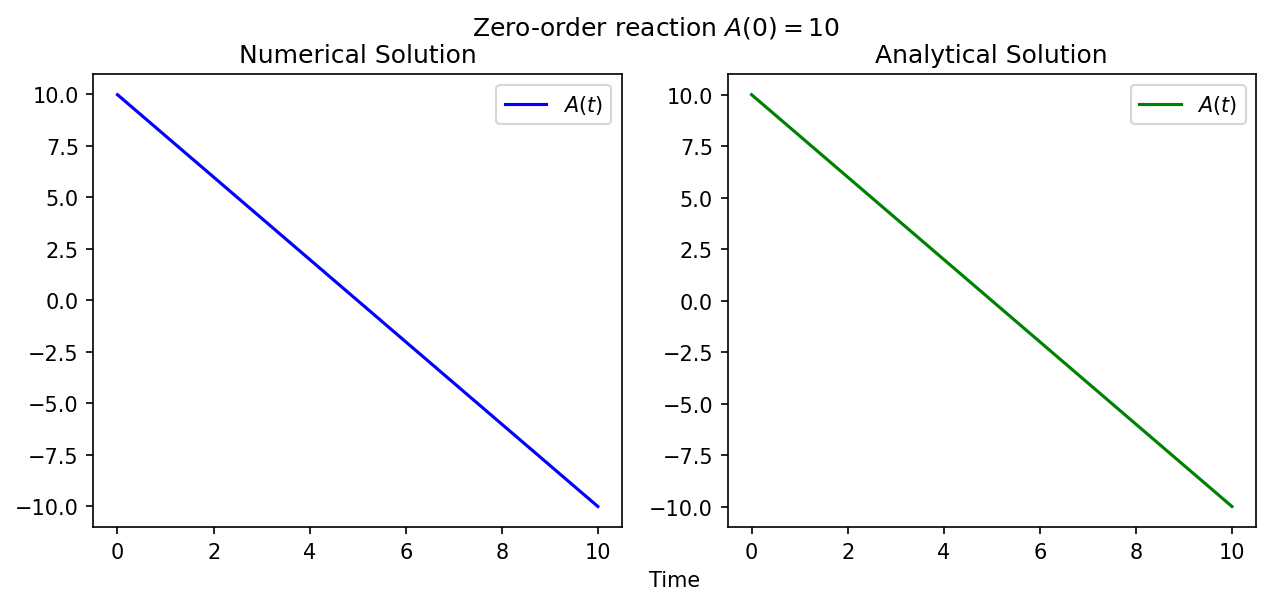

In [132]:
time = np.arange(0, 10, 0.01)  # Same vector used for euler's method
plot_solutions(time, numeric_sol_zero, analytic_sol_zero, "Zero-order reaction $A(0)=10$")

<font size="+2"><b>First-order</b></font> <br> <br>
**Analytical Method**<br>
> We're going to use the same steps taken for zero order

In [133]:
first_order = sp.Eq(-dAdt, k*A(t))
first_order

Eq(-Derivative(A(t), t), k*A(t))

> After the first order equation has been initialised, let's find the general solution with SymPy

In [134]:
analytic_gen_sol_first = sp.dsolve(first_order, A(t))
analytic_gen_sol_first

Eq(A(t), C1*exp(-k*t))

> As always, we'll take $t=0$ to find the arbitrary constant

In [135]:
C1_1 = analytic_gen_sol_first.subs(t,0)
C1_1

Eq(A(0), C1)

> So the solution is :

In [136]:
analytic_gen_sol_first = analytic_gen_sol_first.subs(C1, A(0))
analytic_gen_sol_first

Eq(A(t), A(0)*exp(-k*t))

> Now to find a particular solution, let's take $A(0) = 10$ and $k=2$

In [137]:
analytic_par_sol_first  = analytic_gen_sol_first.subs({A(0) : 10, k : 2})
analytic_par_sol_first

Eq(A(t), 10*exp(-2*t))

> And finally we transform it into a lambda function : 

In [139]:
analytic_sol_first = sp.lambdify(t, analytic_par_sol_first.rhs, "numpy")

**Numerical Method**

> Let's initialize a Python function for the First order reaction

In [140]:
first_order = lambda c,k : -k*c

> And the solution, using Euler's Method and with the same starting condition and rate constant, will be : 

In [142]:
numeric_sol_first = list(euler(Ao, const, equation=first_order))

**Plotting the solutions** <br>
And now let's visulaize the solutions

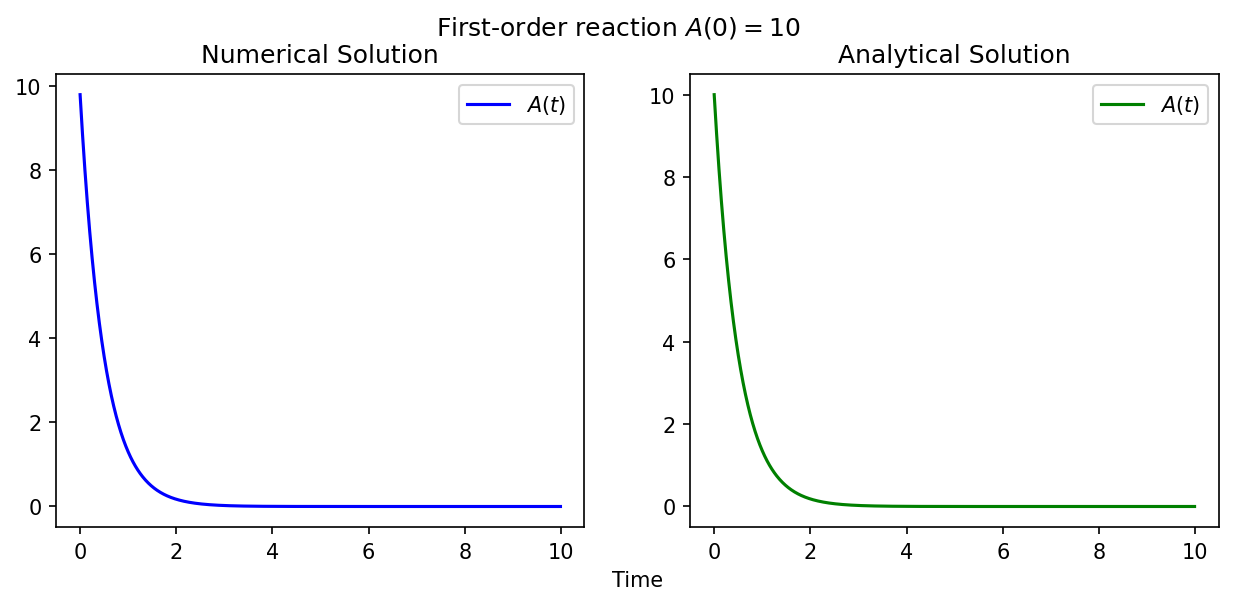

In [143]:
plot_solutions(
    time, numeric_sol_first, analytic_sol_first,
    'First-order reaction $A(0)=10$')  #Same time vector used earlier

<hr class="sep">

# Enzymatic Equilibrium

- Let's consider now a molecule that passes from a chemical conformation to another one in a reversible manner, like an ion channel that opens and closes, this reaction will be : 

$$A \overset{\alpha}{\underset{\beta}\rightleftharpoons} B$$

- $[A] + [B] = c_0$ is always constant, and taking into account the law of conservation of mass we can see that : 
$$\frac{d[B]}{dt} = \alpha[A] - \beta[B]$$

<br>

- If we take into account the fraction of each conformation where $f_\alpha + f_\beta = 1$ : <br>
$$\frac{df_\beta}{dt} = \alpha f_\alpha - \beta f_\beta$$

- Considering $f_\alpha = 1 - f_\beta$, we get : 
$$\frac{df}{dt} = \alpha(1 - f) - \beta f = \alpha - (\alpha + \beta)f$$

<br>


- Finally, consider $\tau = \frac{1}{\alpha+\beta}$ and $f_\infty = \frac{\alpha}{\alpha+\beta}$ : 

$$\boxed{\tau\frac{df}{dt} = f_\infty - f(t)}$$

> This too is a differential equation, now we're going to solve it similairly to zero and first order reactions.

**Analytical Method**
> We're going to use SymPy's algebraic notation, let's initialize our constants and functions.

In [144]:
tau, f_infty= sp.symbols('tau f_\infty')
f = sp.Function('f')
dfdt = f(t).diff(t)

>Let's see our equation :

In [145]:
equilibrium = sp.Eq(tau*dfdt, f_infty - f(t))
equilibrium

Eq(tau*Derivative(f(t), t), f_\infty - f(t))

> Now it's time to see the general solution : 

In [146]:
analytic_gen_sol_eq = sp.dsolve(equilibrium, f(t))
analytic_gen_sol_eq

Eq(f(t), f_\infty + exp((C1 - t)/tau))

> Let's find the arbitrary constant $C_1$ 

In [147]:
eq_0 = analytic_gen_sol_eq.subs(t,0) # Considering that t=0
C1_eq = sp.Eq(sp.solve(eq_0,C1)[0], C1) # Solving the equation t=0 to find C1
C1_eq

Eq(tau*log(-f_\infty + f(0)), C1)

> And the solution is : 

In [148]:
analytic_gen_sol_eq = analytic_gen_sol_eq.subs(C1,C1_eq.lhs)
analytic_gen_sol_eq

Eq(f(t), f_\infty + exp((-t + tau*log(-f_\infty + f(0)))/tau))

> It would be interesting to visualize the solution $f(t)$, so let's assign some values for our constants

In [149]:
analytic_par_sol_eq = analytic_gen_sol_eq.subs({f_infty : 6, tau : 2, f(0) : 0})
analytic_par_sol_eq

Eq(f(t), 6 - 6*exp(-t/2))

> And the final step is always to transform the SymPy expression into a lambda function : 

In [150]:
analytic_sol_eq = sp.lambdify(t, analytic_par_sol_eq.rhs, "numpy")

**Numerical Method**

> We should first create a python function (anonymous function) for our equilibrium reaction : 

In [151]:
eq = lambda f,f_oo,tau : (f_oo - f)/ tau

> Let's assign some values for our constants

In [152]:
f_const, finfty_const, tau_const = 0, 6, 2

> And the numerical solution using Euler's method will be : 

In [153]:
numeric_sol_eq = list(euler(f_const, finfty_const, tau_const, equation=eq))

**Plotting the solutions**

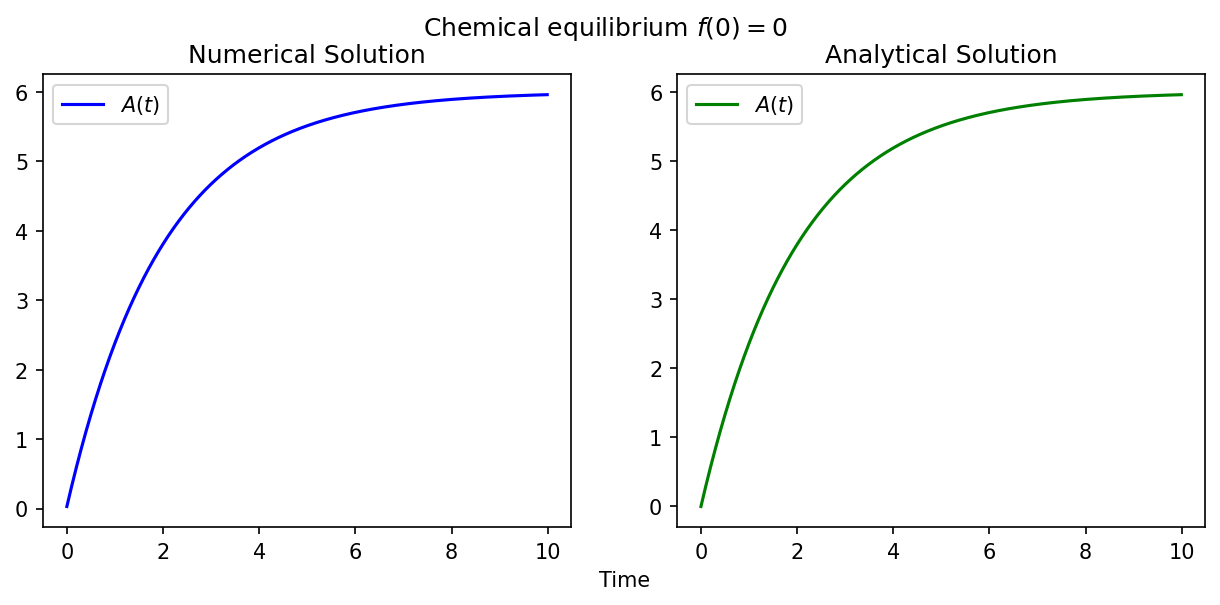

In [154]:
plot_solutions(time, numeric_sol_eq, analytic_sol_eq,
               'Chemical equilibrium $f(0) = 0$')

<hr class="sep">

# Michaelis-Menten-Henri Equation



- Considering the following reaction : 
$$ S + E \overset{k_1}{\underset{k_{-1}}\rightleftharpoons} ES \overset{k_2}{\rightarrow} P + E$$

> Whereas S : Substrate, E : Enzyme, ES : Enzyme-Substrate Complex, P : Product <br>
**The Michaelis-Menten equation** is : 

$$\boxed{ v = \frac{d[P]}{dt} = \frac{V_{max}[S]}{K_m + [S]}}$$
> Where $V_{max} = k_2[E]$ and $K_m$ is the Michaelis constant, it is the concentration of the substrate $[S]$ when the initial rate $v$ is equal to $\frac{V_{max}}{2}$


- If we wanted to graphically determine the constants $K_m$ and $V_{max}$, we're going to use **the Lineweaver-Burk representation** of this equation which we obtain by inversing the earlier equation : 

$$ \boxed{\frac{1}{v} = \frac{K_m}{V_{max}}\frac{1}{[S]} + \frac{1}{V_{max}}}$$


> Let's first start by implementing our two equations : 

In [155]:
def mich_ment(substrate, vmax, km) : 
    """This function returns the rate of the reaction v
    from the Michaelis-Menten equation.
    Substrate : an array of substrate concentrations
    vmax, km : constants of the MM equation, type int"""
    return (vmax*substrate)/(km + substrate)

def line_burk(substrate, vmax, km) : 
    """The Lineweaver-Burk representation, it sends back 1/v
    Substrate : an array of substrate concentrations
    vmax, km : constants of the MM equation, type int"""
    return (km/(vmax*substrate)) + (1/vmax)

> Now let's take a look at how they are grapically represented : 

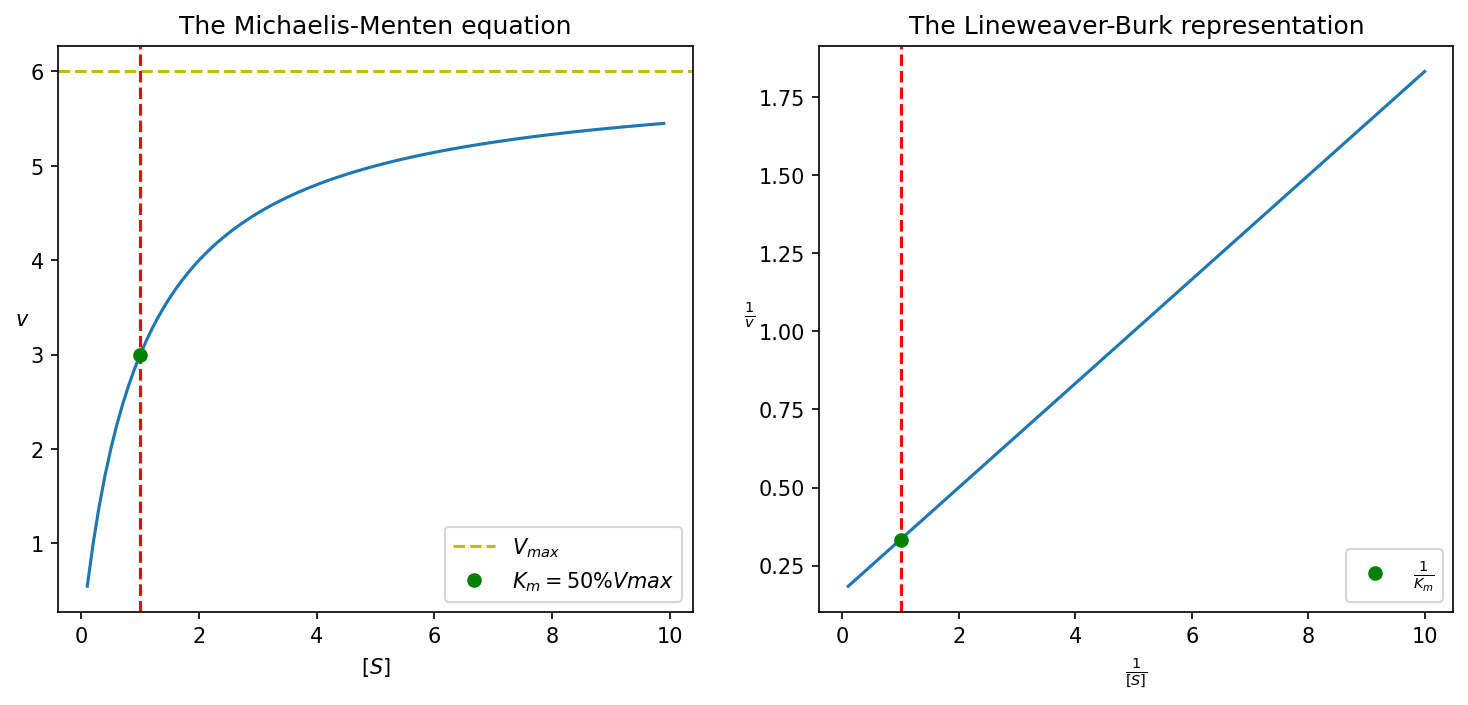

In [156]:
s = np.arange(0.1,10, 0.1) # Substrate concentrations between 0.1 and 10


fig, ax = plt.subplots(1, 2, figsize = (12,5), dpi = 150)
plt.subplot(121) # Michaelis-Menten plot
plt.plot(s, mich_ment(s,vmax = 6, km= 1)) # v-s curve
plt.axhline(y = 6, linestyle = '--', color = 'y', label = '$V_{max}$') # Vmax
plt.axvline(x = 1, linestyle = '--', color = 'r')
plt.plot(1,3, 'og' , label = '$K_m = 50 \% V{max}$') # Km
plt.title('The Michaelis-Menten equation')
plt.xlabel(r'$[S]$')
plt.ylabel(r'$v$', rotation = 0)
plt.legend()
plt.subplot(122) # Lineweaver-Burk plot
plt.plot(1/s, line_burk(s,vmax = 6, km= 1)) # 1/v - 1/s curve
plt.title('The Lineweaver-Burk representation')
plt.axvline(x = 1, linestyle = '--', color = 'r')
plt.plot(1,1/3, 'og' , label = r'$\frac{1}{K_m}$') # 1/Km,  1/Vmax = 1/3
plt.xlabel(r'$\frac{1}{[S]}$')
plt.ylabel(r'$\frac{1}{v}$', rotation = 0)
plt.legend()

<hr class="sep">